<a href="https://colab.research.google.com/github/DinaZakaria/AFLW2000_HeadPose/blob/master/02_ML1_Project_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
import PIL.Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from skimage.io import imread, imsave
from glob import glob
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import math
from google.colab.patches import cv2_imshow
import math

# Functions

In [ ]:
def crop_image_XY (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_max = XY[0].max()
  Y_max = XY[1].max()
  X_min = XY[0].min()
  Y_min = XY[1].min()
  image = imread (image)
  croped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  X_crop = XY[0]-X_min
  Y_crop = XY[1]-Y_min
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop)
  return XY_crop

In [ ]:
def crop_image_XY_min_max (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_max = XY[0].max()
  Y_max = XY[1].max()
  X_min = XY[0].min()
  Y_min = XY[1].min()
  image = imread (image)
  croped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  X_crop = (XY[0]-X_min)/(X_max-X_min)
  Y_crop = (XY[1]-Y_min)/(Y_max-Y_min)
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop)
  return XY_crop

In [ ]:
def crop_image_XY_nose(image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_nose = XY[0][30]
  Y_nose = XY[1][30]
  X_chin = XY[0][8]
  Y_chin = XY[1][8]
  image = imread (image)
  #croped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  X_crop = abs(XY[0]-X_nose)/abs(X_chin-X_nose)
  Y_crop = abs(XY[1]-Y_nose)/abs(Y_chin-Y_nose)
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop)
  return XY_crop

In [ ]:
def image_XY (image, mat_file):
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  return XY

In [ ]:
def get_image_cropped (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_max = XY[0].max()
  Y_max = XY[1].max()
  X_min = XY[0].min()
  Y_min = XY[1].min()
  image = imread (image)
  cropped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  width = X_max - X_min
  return cropped, width

In [ ]:
def get_image (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_max = XY[0].max()
  Y_max = XY[1].max()
  X_min = XY[0].min()
  Y_min = XY[1].min()
  image = imread (image)
  #cropped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  width = X_max - X_min
  return image, width

In [ ]:
def draw_marks(image, marks, color=(255, 0, 0)):
        """Draw mark points on image"""
        #print(marks)
        for mark in marks:
            image = cv2.circle(image, (int(mark[0]), int(mark[1])), 1, color, -1, cv2.LINE_AA)
        return image

In [ ]:
def image_landmarks (image, XY):
  #mat = sio.loadmat(mat)
  #XY = mat['pt3d_68'][0:2]
  marks = np.reshape(XY.T, (-1, 2))
 # print(marks)
  image = imread (image)
  marked_image = draw_marks(image, marks)
  return marked_image


In [ ]:
def get_crop_image_XY_flatten (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_max = XY[0].max()
  Y_max = XY[1].max()
  X_min = XY[0].min()
  Y_min = XY[1].min()
  image = imread (image)
  croped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  X_crop = XY[0]-X_min
  Y_crop = XY[1]-Y_min
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop).flatten()
  return XY_crop

In [ ]:
def get_crop_image_XY_flatten_min_max (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_max = XY[0].max()
  Y_max = XY[1].max()
  X_min = XY[0].min()
  Y_min = XY[1].min()
  image = imread (image)
  croped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  X_crop = (XY[0]-X_min)/(X_max-X_min)
  Y_crop = (XY[1]-Y_min)/(Y_max-Y_min)
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop).flatten()
  return XY_crop

In [ ]:
def get_crop_image_XY_flatten_nose_chin (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_nose = XY[0][30]
  Y_nose = XY[1][30]
  X_chin = XY[0][8]
  Y_chin = XY[1][8]
  image = imread (image)
  dist = math.sqrt((X_chin - X_nose)**2+(Y_chin - Y_nose)**2)
  #croped =image[int(Y_min):int(Y_max), int(X_min):int(X_max)]
  X_crop = abs(XY[0] - X_nose)/dist
  Y_crop = abs(XY[1] - Y_nose)/dist
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop).flatten()
  return XY_crop

In [ ]:
def get_crop_image_XY_flatten_nose_eye (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2]
  X_nose = XY[0][30]
  Y_nose = XY[1][30]
  X_eye = XY[0][17]
  Y_eye = XY[1][17]
  image = imread (image)
  
  #croped =image[int(Y_min):int(Y_mxax), int(X_min):int(X_max)]
  X_crop = abs(XY[0] - X_nose)/abs(X_eye - X_nose)
  Y_crop = abs(XY[1] - Y_nose)/abs(Y_eye - Y_nose)
  XY_crop.append(X_crop)
  XY_crop.append(Y_crop)
  XY_crop = np.array(XY_crop).flatten()
  return XY_crop

In [ ]:
def get_image_XY_flatten (image, mat_file):
  XY_crop = []
  mat = sio.loadmat(mat_file)
  XY = mat['pt3d_68'][0:2].flatten()
  print(XY)
  return XY

In [ ]:
def get_pyr(mat_file):
  #pitch, yaw, roll
  pyr = mat_file['Pose_Para'][:, 0:3][0]
  return pyr

In [ ]:
def create_features_cropped(image_path_list, mat_path_list):
  features = list()
  for i in range (0,len(image_path_list)):
    XY = get_crop_image_XY_flatten(image_path_list[i], mat_path_list[i])
    #print(XY)
    features.append(XY)
  return np.array(features)

In [ ]:
def create_features_cropped_min_max(image_path_list, mat_path_list):
  features = list()
  for i in range (0,len(image_path_list)):
    XY = get_crop_image_XY_flatten_min_max(image_path_list[i], mat_path_list[i])
    #print(XY)
    features.append(XY)
  return np.array(features)

In [ ]:
def create_features_cropped_nose_chin(image_path_list, mat_path_list):
  features = list()
  for i in range (0,len(image_path_list)):
    XY = get_crop_image_XY_flatten_nose_chin(image_path_list[i], mat_path_list[i])
    #print(XY)
    features.append(XY)
  return np.array(features)

In [ ]:
def create_features_cropped_nose_eye(image_path_list, mat_path_list):
  features = list()
  for i in range (0,len(image_path_list)):
    XY = get_crop_image_XY_flatten_nose_eye(image_path_list[i], mat_path_list[i])
    #print(XY)
    features.append(XY)
  return np.array(features)

In [ ]:
def create_features(image_path_list, mat_path_list):
  features = list()
  for i in range (0,len(image_path_list)):
    XY = get_image_XY_flatten(image_path_list[i], mat_path_list[i])
    #print(XY)
    features.append(XY)
  return np.array(features)

In [ ]:
def create_labels (mat_path_list):
  labels = list()
  for i in  range(0, len(mat_path_list)):
    mat_file = sio.loadmat(mat_path_list[i])
    pyr = get_pyr(mat_file)
    labels.append(pyr)
  return np.array(labels)

In [ ]:
def create_df(features, labels):
  # data = np.array([])
  data = np.concatenate((features, labels), axis = 1)
  df = pd.DataFrame(data)
  return df

In [ ]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

   # pitch = pitch * np.pi / 180
   # yaw = -(yaw * np.pi / 180)
   # roll = roll * np.pi / 180
    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (math.cos(yaw) * math.cos(roll)) + tdx
    y1 = size * (math.cos(pitch) * math.sin(roll) + math.cos(roll) * math.sin(pitch) * math.sin(yaw)) + tdy


    # Y-Axis | drawn in green
    #        v
    x2 = size * (-math.cos(yaw) * math.sin(roll)) + tdx
    y2 = size * (math.cos(pitch) * math.cos(roll) - math.sin(pitch) * math.sin(yaw) * math.sin(roll)) + tdy


    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (math.sin(yaw)) + tdx
    y3 = size * (-math.cos(yaw) * math.sin(pitch)) + tdy


    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

# Reading Dataset

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Path = 'drive/My Drive/AI-Pro Track ITI/ML1/Project/DATA/aflw2000_3d_data'


In [ ]:
image_path_list= []
image_path_list.extend(glob(os.path.join(Path, "AFLW2000", "*.jpg")))
mat_path_list = []
mat_path_list.extend(glob(os.path.join(Path, "AFLW2000", "*.mat")))

# for i, image_path in enumerate(image_path_list):
#     # read image
#     image = imread(image_path)
print(len(image_path_list))
print(len(mat_path_list))
image_path_list = sorted(image_path_list)
mat_path_list = sorted(mat_path_list)

2000
2000


# Dataframe

### Create Original Dataframe

In [ ]:
features = create_features(image_path_list, mat_path_list)
labels = create_labels(mat_path_list)
df = create_df(features, labels)
df

Streaming output truncated to the last 5000 lines.
 167.54382  178.54395  191.02779  201.97383  191.91243  178.20363
 254.75192  267.39474  280.51813  287.03253  279.31165  266.53363
 196.03882  212.01164  230.14543  239.1066   247.47803  261.27533
 269.26743  261.2486   252.18063  240.04106  226.73451  213.36247
 199.55188  227.13533  238.81415  249.38843  267.4301   250.51233
 239.97089  228.02713  222.8538   251.08556  276.9251   299.87003
 324.15912  344.6859   357.8791   370.10596  376.1869   368.45557
 355.33533  341.56763  321.45184  297.73743  274.73615  248.96927
 220.80495  197.66219  188.2724   186.59686  188.93063  192.60867
 193.39142  190.09827  188.02081  189.74393  197.41629  223.93373
 241.89423  259.1789   273.54486  282.61667  284.38156  285.51135
 282.4148   279.85144  221.40779  216.64044  216.2838   222.28452
 225.8268   226.5243   222.25757  215.08719  215.4636   220.77078
 225.652    225.41286  315.55554  306.90796  300.8025   302.02432
 299.45676  302.85266  30

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,121.868034,122.367607,126.819237,130.831787,137.523132,148.521729,161.528015,182.876678,213.940063,248.005371,...,310.149048,313.233856,315.107117,322.384613,330.965576,330.701965,324.903870,-0.399231,0.018227,0.085676
1,281.238159,277.339417,274.876953,269.523773,257.788269,240.968155,221.801483,205.846298,207.085449,226.185638,...,303.093811,300.724457,300.060974,303.260895,299.485168,300.598602,302.286499,0.470065,1.189533,0.300959
2,236.385101,239.198257,242.566376,243.971375,242.828186,238.567902,232.561859,229.155289,238.303162,259.122467,...,303.122009,302.877289,302.146454,300.489380,303.481873,304.681732,304.631042,-0.184650,0.881137,-0.236852
3,168.029221,177.697510,190.641602,201.395294,211.957214,222.723099,231.350220,244.332855,268.327637,291.832214,...,315.469391,312.701294,310.133301,300.041290,315.544800,319.498596,320.843994,-0.175379,0.299208,-0.373374
4,280.462250,287.249817,293.892456,297.539368,295.677002,287.270355,271.661591,254.701157,250.219299,261.212463,...,306.811768,307.014893,305.351318,309.934814,311.558899,312.920746,312.058350,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,112.578934,113.787857,119.259262,125.335999,133.637939,146.153839,162.205170,183.907257,213.987427,243.809875,...,317.068970,317.718140,319.277924,321.063141,324.635498,324.518494,322.085815,-0.197102,-0.070430,0.105118
1996,111.117966,113.647079,115.328712,120.565918,134.109467,158.448425,187.568314,212.202332,223.977646,218.683380,...,316.934998,316.013428,315.392395,316.949585,316.981415,317.922302,318.168457,-0.232617,-1.418751,0.175960
1997,308.227417,309.905334,311.432251,310.488586,303.662415,288.275238,268.575409,248.855255,239.939240,248.186981,...,311.084686,311.580597,311.960449,316.873444,314.677002,315.051239,313.333374,-1.447955,1.431267,-1.509418
1998,106.611572,106.089981,107.328842,109.023941,116.216049,136.338547,162.523712,190.193268,208.983047,210.192596,...,309.402283,310.208862,310.287506,312.933044,313.265747,313.581848,312.269653,-0.420465,-1.191176,0.451515


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,149.718688,152.113179,156.829241,161.498873,168.151080,178.698998,190.683158,206.126739,229.185386,252.139713,...,306.413615,306.141129,306.201093,308.393358,313.973390,314.897968,313.851623,-0.107145,0.014077,-0.034479
std,59.672788,58.092475,56.906871,55.078724,50.565021,42.259369,32.965426,26.903775,25.625110,27.110695,...,10.900385,10.758188,10.911467,12.102787,11.728720,11.899011,11.648587,0.628119,0.654185,0.716014
min,-65.141368,-60.022004,-51.570734,-40.715029,-18.620156,19.966426,70.056157,98.584244,119.978928,117.472961,...,229.170975,238.149551,240.426376,223.685165,246.933441,234.098953,223.240616,-12.457202,-6.130066,-16.969362
25%,109.946310,112.587660,116.569265,122.258705,132.425362,149.270248,169.422638,190.987324,215.788464,237.282799,...,299.945061,299.918037,299.640274,301.898743,307.109940,307.806778,307.245926,-0.258503,-0.294246,-0.174806
50%,128.190331,129.386398,136.064972,141.836891,151.342422,167.026482,185.000839,203.907646,228.626091,253.304932,...,306.768982,306.414825,306.708450,308.852005,314.597946,315.429718,314.469330,-0.122268,0.019702,-0.018098
75%,171.145020,174.019173,181.380264,186.516525,193.215321,200.848389,208.786400,220.502052,240.992599,266.496109,...,313.380318,313.146561,313.297981,315.713745,321.673462,322.546310,321.178680,0.040192,0.334715,0.134378
max,362.664581,364.748291,370.063782,376.669037,373.388000,357.916351,331.834778,332.619537,340.515991,352.252411,...,365.659033,364.765353,368.830506,393.602312,377.756390,377.990305,374.957928,15.598820,3.277500,5.829394


In [ ]:
df.to_csv("AFLW2000_CSV_Original.csv", index = None, header = True)

### Create Cropped Images DataFrame

In [ ]:
features = create_features_cropped(image_path_list, mat_path_list)
labels = create_labels(mat_path_list)
df_cropped = create_df(features, labels)
df_cropped

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0.000000,0.499573,4.951202,8.963753,15.655098,26.653694,39.659981,61.008644,92.072029,126.137337,...,142.984833,146.069641,147.942902,155.220398,163.801361,163.537750,157.739655,-0.399231,0.018227,0.085676
1,95.086197,91.187454,88.724991,83.371811,71.636307,54.816193,35.649521,19.694336,20.933487,40.033676,...,106.506088,104.136734,103.473251,106.673172,102.897446,104.010880,105.698776,0.470065,1.189533,0.300959
2,47.435440,50.248596,53.616714,55.021713,53.878525,49.618240,43.612198,40.205627,49.353500,70.172806,...,94.730255,94.485535,93.754700,92.097626,95.090118,96.289978,96.239288,-0.184650,0.881137,-0.236852
3,19.755783,29.424072,42.368164,53.121857,63.683777,74.449661,83.076782,96.059418,120.054199,143.558777,...,136.482361,133.714264,131.146271,121.054260,136.557770,140.511566,141.856964,-0.175379,0.299208,-0.373374
4,106.486710,113.274277,119.916916,123.563828,121.701462,113.294815,97.686050,80.725616,76.243759,87.236923,...,103.704086,103.907211,102.243637,106.827133,108.451218,109.813065,108.950668,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,1.208923,6.680328,12.757065,21.059006,33.574905,49.626236,71.328323,101.408493,131.230942,...,136.631104,137.280273,138.840057,140.625275,144.197632,144.080627,141.647949,-0.197102,-0.070430,0.105118
1996,0.000000,2.529114,4.210747,9.447952,22.991501,47.330460,76.450348,101.084366,112.859680,107.565414,...,121.055023,120.133453,119.512421,121.069611,121.101440,122.042328,122.288483,-0.232617,-1.418751,0.175960
1997,128.995865,130.673782,132.200699,131.257034,124.430862,109.043686,89.343857,69.623703,60.707687,68.955429,...,108.177155,108.673065,109.052917,113.965912,111.769470,112.143707,110.425842,-1.447955,1.431267,-1.509418
1998,0.521591,0.000000,1.238861,2.933960,10.126068,30.248566,56.433731,84.103287,102.893066,104.102615,...,126.559540,127.366119,127.444763,130.090302,130.423004,130.739105,129.426910,-0.420465,-1.191176,0.451515


In [ ]:
df_cropped.to_csv("AFLW2000_CSV_Cropped.csv", index = None, header = True)

In [ ]:
features_min_max = create_features_cropped_min_max(image_path_list, mat_path_list)
labels = create_labels(mat_path_list)
df_cropped_min_max = create_df(features_min_max, labels)
df_cropped_min_max

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0.000000,0.002236,0.022166,0.040129,0.070085,0.119324,0.177551,0.273125,0.412190,0.564695,...,0.685561,0.700351,0.709333,0.744226,0.785368,0.784104,0.756305,-0.399231,0.018227,0.085676
1,0.612916,0.587785,0.571912,0.537406,0.461760,0.353340,0.229793,0.126948,0.134935,0.258053,...,0.690062,0.674710,0.670412,0.691144,0.666681,0.673895,0.684831,0.470065,1.189533,0.300959
2,0.333827,0.353624,0.377328,0.387215,0.379170,0.349188,0.306921,0.282947,0.347325,0.493841,...,0.662352,0.660641,0.655531,0.643944,0.664868,0.673257,0.672903,-0.184650,0.881137,-0.236852
3,0.104895,0.156230,0.224958,0.282055,0.338135,0.395297,0.441104,0.510036,0.637438,0.762238,...,0.742778,0.727713,0.713738,0.658814,0.743189,0.764706,0.772028,-0.175379,0.299208,-0.373374
4,0.688366,0.732243,0.775183,0.798758,0.786719,0.732376,0.631475,0.521837,0.492865,0.563929,...,0.676315,0.677639,0.666790,0.696682,0.707274,0.716155,0.710531,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.005539,0.030607,0.058449,0.096486,0.153831,0.227373,0.326806,0.464625,0.601263,...,0.711023,0.714401,0.722519,0.731809,0.750399,0.749790,0.737131,-0.197102,-0.070430,0.105118
1996,0.000000,0.015773,0.026260,0.058922,0.143387,0.295178,0.476785,0.630416,0.703853,0.670835,...,0.676517,0.671367,0.667897,0.676599,0.676777,0.682035,0.683411,-0.232617,-1.418751,0.175960
1997,0.954702,0.967120,0.978421,0.971437,0.920916,0.807035,0.661236,0.515287,0.449299,0.510341,...,0.620084,0.622927,0.625104,0.653266,0.640676,0.642821,0.632974,-1.447955,1.431267,-1.509418
1998,0.002950,0.000000,0.007006,0.016591,0.057261,0.171050,0.319123,0.475589,0.581842,0.588682,...,0.660357,0.664565,0.664976,0.678779,0.680515,0.682165,0.675318,-0.420465,-1.191176,0.451515


In [ ]:
df_cropped_min_max.to_csv("AFLW2000_CSV_min_max.csv", index = None, header = True)

In [ ]:
features_nose_chin = create_features_cropped_nose_chin(image_path_list, mat_path_list)
labels = create_labels(mat_path_list)
df_cropped_nose_chin = create_df(features_nose_chin, labels)
df_cropped_nose_chin

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,1.091282,1.086000,1.038936,0.996514,0.925771,0.809490,0.671983,0.446277,0.117864,0.242286,...,0.299680,0.332294,0.352098,0.429039,0.519759,0.516972,0.455673,-0.399231,0.018227,0.085676
1,1.111359,1.065791,1.037010,0.974442,0.837279,0.640687,0.416669,0.230186,0.244669,0.467910,...,0.476117,0.448424,0.440669,0.478069,0.433939,0.446953,0.466681,0.470065,1.189533,0.300959
2,0.454202,0.486088,0.524265,0.540191,0.527233,0.478943,0.410866,0.372253,0.475943,0.711926,...,0.332108,0.329334,0.321050,0.302267,0.336187,0.349787,0.349212,-0.184650,0.881137,-0.236852
3,0.517121,0.414664,0.277493,0.163534,0.051607,0.062481,0.153905,0.291484,0.545762,0.794845,...,0.344654,0.315320,0.288107,0.181159,0.345453,0.387353,0.401610,-0.175379,0.299208,-0.373374
4,1.001988,1.065856,1.128360,1.162676,1.145152,1.066049,0.919178,0.759589,0.717417,0.820857,...,0.229622,0.231534,0.215880,0.259009,0.274290,0.287105,0.278990,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.252641,1.239865,1.182042,1.117822,1.030085,0.897815,0.728181,0.498829,0.180936,0.134234,...,0.396641,0.403502,0.419986,0.438852,0.476606,0.475369,0.449660,-0.197102,-0.070430,0.105118
1996,1.472311,1.449088,1.433647,1.385559,1.261200,1.037717,0.770335,0.544143,0.436020,0.484633,...,0.368444,0.359982,0.354280,0.368578,0.368870,0.377510,0.379770,-0.232617,-1.418751,0.175960
1997,1.081796,1.095867,1.108672,1.100759,1.043512,0.914471,0.749263,0.583884,0.509112,0.578280,...,0.304870,0.309029,0.312214,0.353416,0.334996,0.338135,0.323728,-1.447955,1.431267,-1.509418
1998,1.340094,1.344059,1.334643,1.321759,1.267096,1.114157,0.915139,0.704839,0.562029,0.552836,...,0.332378,0.338509,0.339106,0.359214,0.361742,0.364145,0.354171,-0.420465,-1.191176,0.451515


In [ ]:
df_cropped_nose_chin.describe()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.982661,0.957970,0.917861,0.873389,0.797407,0.671292,0.524325,0.369613,0.277421,0.392932,...,0.351904,0.349550,0.349729,0.368976,0.423343,0.432542,0.422412,-0.107145,0.014077,-0.034479
std,0.465735,0.457568,0.451332,0.440583,0.413725,0.358478,0.290014,0.226769,0.203708,0.228815,...,0.064188,0.058623,0.066789,0.109093,0.072898,0.069391,0.070299,0.628119,0.654185,0.716014
min,0.001276,0.000446,0.000613,0.001605,0.000185,0.000850,0.000021,0.000146,0.000048,0.001246,...,0.005790,0.041256,0.007927,0.001610,0.014666,0.019763,0.012086,-12.457202,-6.130066,-16.969362
25%,0.636689,0.618911,0.580416,0.537307,0.488704,0.393220,0.296531,0.189919,0.104070,0.216188,...,0.316552,0.316664,0.312843,0.305366,0.386140,0.394719,0.385037,-0.258503,-0.294246,-0.174806
50%,1.009429,0.987171,0.938833,0.898048,0.812093,0.675367,0.520276,0.346707,0.246317,0.373126,...,0.359513,0.355493,0.358734,0.380308,0.428901,0.437636,0.428072,-0.122268,0.019702,-0.018098
75%,1.352963,1.330231,1.286893,1.230680,1.126517,0.953634,0.745145,0.530183,0.409592,0.553061,...,0.397908,0.390865,0.396449,0.440269,0.466681,0.473515,0.464629,0.040192,0.334715,0.134378
max,3.169890,2.600180,2.247002,2.156541,1.979221,1.647210,1.357087,1.145315,0.988148,1.037080,...,0.544504,0.532746,0.550865,0.661585,0.741273,0.762734,0.731805,15.598820,3.277500,5.829394


In [ ]:
df_cropped_nose_chin.to_csv("AFLW2000_CSV_nose_chin_dist_abs.csv", index = None, header = True)

In [ ]:
features_nose_eye = create_features_cropped_nose_eye(image_path_list, mat_path_list)
labels = create_labels(mat_path_list)
df_cropped_nose_eye = create_df(features_nose_eye, labels)
df_cropped_nose_eye

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,1.282631,1.276423,1.221106,1.171246,1.088098,0.951428,0.789810,0.524529,0.138531,0.284769,...,0.267842,0.296991,0.314692,0.383458,0.464541,0.462050,0.407263,-0.399231,0.018227,0.085676
1,2.652543,2.543783,2.475090,2.325756,1.998380,1.529163,0.994486,0.549397,0.583965,1.116787,...,1.272703,1.198677,1.177948,1.277923,1.159958,1.194745,1.247480,0.470065,1.189533,0.300959
2,16.203279,17.340809,18.702745,19.270872,18.808611,17.085918,14.657309,13.279824,16.978868,25.397383,...,0.587786,0.582877,0.568215,0.534972,0.595005,0.619076,0.618059,-0.184650,0.881137,-0.236852
3,0.711820,0.570788,0.381971,0.225105,0.071037,0.086006,0.211851,0.401230,0.751244,1.094108,...,0.653713,0.598074,0.546458,0.343609,0.655229,0.734700,0.761742,-0.175379,0.299208,-0.373374
4,3.965207,4.217953,4.465303,4.601101,4.531754,4.218718,3.637500,3.005951,2.839061,3.248410,...,0.476417,0.480383,0.447905,0.537388,0.569094,0.595681,0.578845,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.373866,1.359854,1.296435,1.226000,1.129772,0.984701,0.798651,0.547104,0.198446,0.147224,...,0.394737,0.401565,0.417970,0.436746,0.474318,0.473087,0.447502,-0.197102,-0.070430,0.105118
1996,2.136651,2.102950,2.080542,2.010754,1.830283,1.505959,1.117928,0.789672,0.632763,0.703311,...,0.648893,0.633990,0.623947,0.649129,0.649643,0.664859,0.668839,-0.232617,-1.418751,0.175960
1997,2.924503,2.962544,2.997161,2.975767,2.821009,2.472162,2.025541,1.578459,1.376322,1.563309,...,0.609605,0.617921,0.624291,0.706676,0.669844,0.676120,0.647313,-1.447955,1.431267,-1.509418
1998,2.074543,2.080680,2.066104,2.046160,1.961538,1.724779,1.416688,1.091132,0.870054,0.855822,...,0.567183,0.577644,0.578664,0.612976,0.617291,0.621390,0.604372,-0.420465,-1.191176,0.451515


In [ ]:
df_cropped_nose_eye.describe()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.109349,2.128311,2.150168,2.129055,2.011582,1.769417,1.454054,1.174592,1.153244,1.616028,...,0.929695,0.867316,0.821518,0.834308,0.998900,1.065498,1.096898,-0.107145,0.014077,-0.034479
std,4.882555,5.206214,5.698474,5.931994,5.815825,5.375704,4.663747,4.258864,4.868237,6.643773,...,3.343021,2.764090,2.296373,2.180128,2.661352,3.145405,3.608177,0.628119,0.654185,0.716014
min,0.009634,0.001353,0.001451,0.002427,0.000291,0.001258,0.000045,0.000253,0.000078,0.001442,...,0.008459,0.046839,0.009000,0.003702,0.017681,0.022437,0.013722,-12.457202,-6.130066,-16.969362
25%,1.124744,1.079226,1.001474,0.914082,0.799707,0.647373,0.487706,0.289514,0.137437,0.272653,...,0.401670,0.408830,0.409664,0.413082,0.502672,0.507911,0.483056,-0.258503,-0.294246,-0.174806
50%,1.374366,1.356152,1.295192,1.238547,1.131345,0.952338,0.734605,0.493515,0.351504,0.528082,...,0.536709,0.533015,0.530531,0.549688,0.641688,0.653339,0.643194,-0.122268,0.019702,-0.018098
75%,1.832381,1.860968,1.839032,1.781442,1.677359,1.444386,1.140865,0.854470,0.778330,1.088950,...,0.745221,0.721992,0.714861,0.777771,0.867983,0.900752,0.900710,0.040192,0.334715,0.134378
max,116.960709,124.356750,135.910309,140.529785,132.868118,117.560989,95.499451,91.812386,107.111137,154.378967,...,83.827408,64.740631,53.462704,47.633663,59.032978,70.061562,83.929733,15.598820,3.277500,5.829394


In [ ]:
df_cropped_nose_eye.to_csv("AFLW2000_CSV_eye.csv", index = None, header = True)

### Draw Axes on Cropped Images

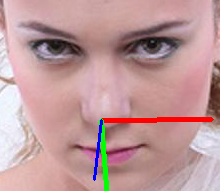

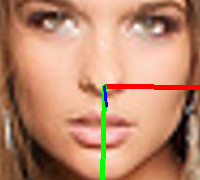

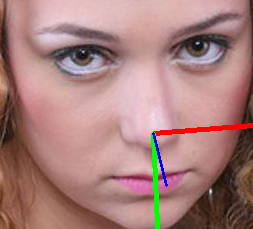

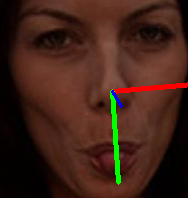

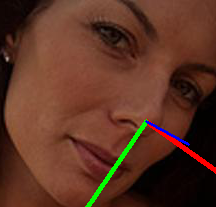

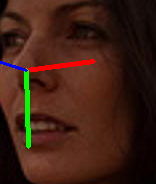

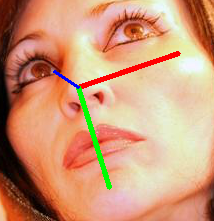

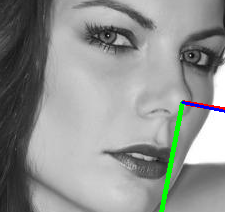

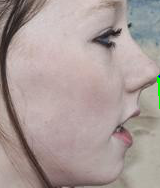

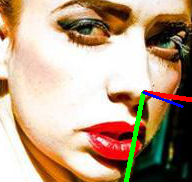

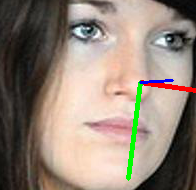

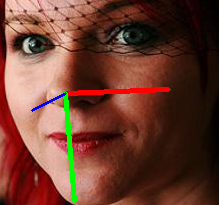

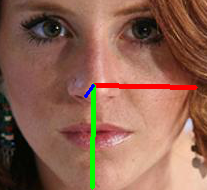

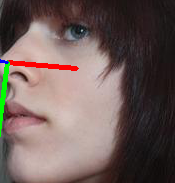

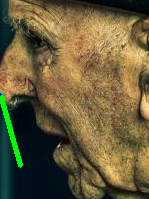

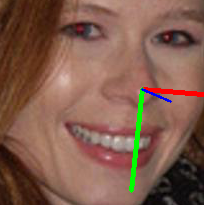

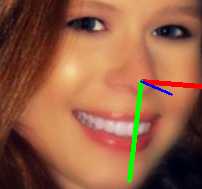

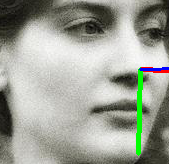

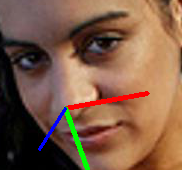

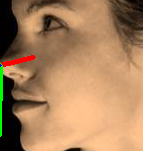

In [ ]:
for i in range(1000,1020):
  cropped, width = get_image_cropped(image_path_list[i], mat_path_list[i])
  # image_land = image_landmarks(cropped, XY_crop)
  # plt.imshow(image_land)
  # plt.show()
 # img = imread(cropped)
  img1 = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

  p = df_cropped.iloc[i,136]
  y = df_cropped.iloc[i,137]
  r = df_cropped.iloc[i,138]
  img = draw_axis(img1, y, p, r,df_cropped.iloc[i,30] ,df_cropped.iloc[i,98], width//2 )
  cv2_imshow(img)